### **Fusion Transcript Data Wrangling**

#### Concatenating and Filtering Raw Fusion Transcript Output from Arriba and FusionCatcher

This notebook details the processes (semi-automated) done to further process the raw output files from Arriba and FusionCatcher fusion transcript callers. 

1. Run the `wrangle-ft-tsv.py` script to generate fusion transcript list from Arriba and FusionCatcher output files. The script takes a mandatory input of path to the directory where sample-specific fusion call output files from Arriba or FusionCatcher are stored as the first argument, and the specific string that is used to identify tool name (`arr` for Arriba fusion transcript call output file prefix, for instance). 

For example:
> ``` wrangle-ft-tsv.py data/FTmyBRCAs_raw/Arriba arr ```

In [1]:
import polars as pl

In [2]:
# load up Arriba and FusionCatcher merged dataframes lazily
arriba_mdf = pl.scan_parquet('output/myBRCA/Arriba-fusiontranscript-raw-list.parquet')
fc_mdf = pl.scan_parquet('output/myBRCA/FusionCatcher-fusiontranscript-raw-list.parquet')

In [3]:
arriba_mdf.collect()

fusionTranscriptID,fusionGeneID,breakpointPair,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
cat,cat,cat,cat,cat,cat,cat,cat,cat,i64,cat
"""TRMT11::SMG6__…","""TRMT11::SMG6""","""6:125986622-17…","""+""","""-""","""CDS/splice-sit…","""CDS/splice-sit…","""translocation""","""high""",1,"""Arriba"""
"""STAG3::MEF2C-A…","""STAG3::MEF2C-A…","""7:100189570-5:…","""+""","""-""","""CDS""","""intron""","""translocation/…","""low""",1,"""Arriba"""
"""MAPK13::C1QL1_…","""MAPK13::C1QL1""","""6:36132629-17:…","""+""","""+""","""CDS""","""intron""","""translocation/…","""low""",1,"""Arriba"""
"""STX16::NPEPL1_…","""STX16::NPEPL1""","""20:58673711-20…","""+""","""+""","""CDS/splice-sit…","""5'UTR/splice-s…","""deletion/read-…","""low""",1,"""Arriba"""
"""MAPK13::NMT1__…","""MAPK13::NMT1""","""6:36132629-17:…","""+""","""+""","""CDS""","""intron""","""translocation""","""low""",1,"""Arriba"""
"""TMEM63A::SRP9(…","""TMEM63A::SRP9(…","""1:225853629-1:…","""-""","""-""","""CDS/splice-sit…","""intergenic""","""deletion/read-…","""high""",2,"""Arriba"""
"""PCMT1::AL13609…","""PCMT1::AL13609…","""6:149773169-6:…","""+""","""+""","""CDS/splice-sit…","""intergenic""","""deletion""","""high""",2,"""Arriba"""
"""RCOR3::AL59104…","""RCOR3::AL59104…","""1:211274262-1:…","""+""","""-""","""CDS/splice-sit…","""exon""","""inversion/3'-3…","""high""",2,"""Arriba"""
"""TRAF5::C4BPB__…","""TRAF5::C4BPB""","""1:211326889-1:…","""+""","""+""","""5'UTR/splice-s…","""CDS/splice-sit…","""duplication""","""high""",2,"""Arriba"""


In [6]:
fc_mdf.collect()

fusionTranscriptID,fusionGeneID,breakpointPair,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
cat,cat,cat,cat,cat,cat,cat,cat,cat,i64,cat
"""SIDT2::TAGLN__…","""SIDT2::TAGLN""","""11:117195915-1…","""+""","""+""","""CDS(truncated)…","""UTR""",""".""",""".""",2,"""FusionCatcher"""
"""AZGP1::GJC3__7…","""AZGP1::GJC3""","""7:99971746-7:9…","""-""","""-""","""in-frame""",""".""",""".""",""".""",2,"""FusionCatcher"""
"""NPEPPS::TBC1D3…","""NPEPPS::TBC1D3…","""17:47592545-17…","""+""","""-""","""CDS(complete)""","""UTR""",""".""",""".""",2,"""FusionCatcher"""
"""CYP4F11::CYP4F…","""CYP4F11::CYP4F…","""19:15914762-19…","""-""","""+""","""CDS(truncated)…","""exonic(no-know…",""".""",""".""",2,"""FusionCatcher"""
"""SLC49A3::ATP5M…","""SLC49A3::ATP5M…","""4:686532-4:673…","""-""","""-""","""out-of-frame""",""".""",""".""",""".""",3,"""FusionCatcher"""
"""AZGP1::GJC3__7…","""AZGP1::GJC3""","""7:99971746-7:9…","""-""","""-""","""in-frame""",""".""",""".""",""".""",4,"""FusionCatcher"""
"""MALRD1::PLXDC2…","""MALRD1::PLXDC2…","""10:19790186-10…","""+""","""+""","""UTR""","""CDS(truncated)…",""".""",""".""",4,"""FusionCatcher"""
"""AC004066.1::PP…","""AC004066.1::PP…","""4:105552193-4:…","""-""","""-""","""exonic(no-know…","""CDS(truncated)…",""".""",""".""",4,"""FusionCatcher"""
"""NPEPPS::TBC1D3…","""NPEPPS::TBC1D3…","""17:47592545-17…","""+""","""-""","""CDS(complete)""","""UTR""",""".""",""".""",4,"""FusionCatcher"""


Now, we can merge the two dataframes into one masterFrame. Use Polars' `concat` (vertical concatenation is the default, where two dataframes sharing the exact same columns would be joined together, adding all rows of dataframe 1 and 2 vertically).

In [5]:
joined_df = pl.concat(
    [
        arriba_mdf.collect(),
        fc_mdf.collect()
    ]
)

joined_df

sys:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance


fusionTranscriptID,fusionGeneID,breakpointPair,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
cat,cat,cat,cat,cat,cat,cat,cat,cat,i64,cat
"""TRMT11::SMG6__…","""TRMT11::SMG6""","""6:125986622-17…","""+""","""-""","""CDS/splice-sit…","""CDS/splice-sit…","""translocation""","""high""",1,"""Arriba"""
"""STAG3::MEF2C-A…","""STAG3::MEF2C-A…","""7:100189570-5:…","""+""","""-""","""CDS""","""intron""","""translocation/…","""low""",1,"""Arriba"""
"""MAPK13::C1QL1_…","""MAPK13::C1QL1""","""6:36132629-17:…","""+""","""+""","""CDS""","""intron""","""translocation/…","""low""",1,"""Arriba"""
"""STX16::NPEPL1_…","""STX16::NPEPL1""","""20:58673711-20…","""+""","""+""","""CDS/splice-sit…","""5'UTR/splice-s…","""deletion/read-…","""low""",1,"""Arriba"""
"""MAPK13::NMT1__…","""MAPK13::NMT1""","""6:36132629-17:…","""+""","""+""","""CDS""","""intron""","""translocation""","""low""",1,"""Arriba"""
"""TMEM63A::SRP9(…","""TMEM63A::SRP9(…","""1:225853629-1:…","""-""","""-""","""CDS/splice-sit…","""intergenic""","""deletion/read-…","""high""",2,"""Arriba"""
"""PCMT1::AL13609…","""PCMT1::AL13609…","""6:149773169-6:…","""+""","""+""","""CDS/splice-sit…","""intergenic""","""deletion""","""high""",2,"""Arriba"""
"""RCOR3::AL59104…","""RCOR3::AL59104…","""1:211274262-1:…","""+""","""-""","""CDS/splice-sit…","""exon""","""inversion/3'-3…","""high""",2,"""Arriba"""
"""TRAF5::C4BPB__…","""TRAF5::C4BPB""","""1:211326889-1:…","""+""","""+""","""5'UTR/splice-s…","""CDS/splice-sit…","""duplication""","""high""",2,"""Arriba"""


Now sort `sampleID` in ascending order.

In [7]:
joined_df.sort("sampleID")

fusionTranscriptID,fusionGeneID,breakpointPair,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
cat,cat,cat,cat,cat,cat,cat,cat,cat,i64,cat
"""TRMT11::SMG6__…","""TRMT11::SMG6""","""6:125986622-17…","""+""","""-""","""CDS/splice-sit…","""CDS/splice-sit…","""translocation""","""high""",1,"""Arriba"""
"""STAG3::MEF2C-A…","""STAG3::MEF2C-A…","""7:100189570-5:…","""+""","""-""","""CDS""","""intron""","""translocation/…","""low""",1,"""Arriba"""
"""MAPK13::C1QL1_…","""MAPK13::C1QL1""","""6:36132629-17:…","""+""","""+""","""CDS""","""intron""","""translocation/…","""low""",1,"""Arriba"""
"""STX16::NPEPL1_…","""STX16::NPEPL1""","""20:58673711-20…","""+""","""+""","""CDS/splice-sit…","""5'UTR/splice-s…","""deletion/read-…","""low""",1,"""Arriba"""
"""MAPK13::NMT1__…","""MAPK13::NMT1""","""6:36132629-17:…","""+""","""+""","""CDS""","""intron""","""translocation""","""low""",1,"""Arriba"""
"""TMEM63A::SRP9(…","""TMEM63A::SRP9(…","""1:225853629-1:…","""-""","""-""","""CDS/splice-sit…","""intergenic""","""deletion/read-…","""high""",2,"""Arriba"""
"""PCMT1::AL13609…","""PCMT1::AL13609…","""6:149773169-6:…","""+""","""+""","""CDS/splice-sit…","""intergenic""","""deletion""","""high""",2,"""Arriba"""
"""RCOR3::AL59104…","""RCOR3::AL59104…","""1:211274262-1:…","""+""","""-""","""CDS/splice-sit…","""exon""","""inversion/3'-3…","""high""",2,"""Arriba"""
"""TRAF5::C4BPB__…","""TRAF5::C4BPB""","""1:211326889-1:…","""+""","""+""","""5'UTR/splice-s…","""CDS/splice-sit…","""duplication""","""high""",2,"""Arriba"""


In [8]:
all_ft_counts = joined_df.select(pl.col("fusionTranscriptID").value_counts(sort=True))
all_ft_counts.unnest("fusionTranscriptID")

fusionTranscriptID,count
cat,u32
"""CTBS::GNG5__1:…",661
"""AZGP1::GJC3__7…",608
"""NPEPPS::TBC1D3…",608
"""TMED7::TICAM2_…",428
"""SIDT2::TAGLN__…",412
"""TVP23C::CDRT4_…",400
"""RBM14::RBM4__1…",328
"""AC092807.3::DD…",308
"""RBM14::RBM4__1…",304


# Filter Out non-TNBCs

We can filter out rows corresponding to `sampleID` more than 172, because these are not TNBC samples.



In [64]:
tnbc_only_df = joined_df.filter(pl.col("sampleID") < 173)

In [65]:
tnbc_only_df

fusionTranscriptID,fusionGeneID,breakpointPair,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
cat,cat,cat,cat,cat,cat,cat,cat,cat,i64,cat
"""TRMT11::SMG6__…","""TRMT11::SMG6""","""6:125986622-17…","""+""","""-""","""CDS/splice-sit…","""CDS/splice-sit…","""translocation""","""high""",1,"""Arriba"""
"""STAG3::MEF2C-A…","""STAG3::MEF2C-A…","""7:100189570-5:…","""+""","""-""","""CDS""","""intron""","""translocation/…","""low""",1,"""Arriba"""
"""MAPK13::C1QL1_…","""MAPK13::C1QL1""","""6:36132629-17:…","""+""","""+""","""CDS""","""intron""","""translocation/…","""low""",1,"""Arriba"""
"""STX16::NPEPL1_…","""STX16::NPEPL1""","""20:58673711-20…","""+""","""+""","""CDS/splice-sit…","""5'UTR/splice-s…","""deletion/read-…","""low""",1,"""Arriba"""
"""MAPK13::NMT1__…","""MAPK13::NMT1""","""6:36132629-17:…","""+""","""+""","""CDS""","""intron""","""translocation""","""low""",1,"""Arriba"""
"""TMEM63A::SRP9(…","""TMEM63A::SRP9(…","""1:225853629-1:…","""-""","""-""","""CDS/splice-sit…","""intergenic""","""deletion/read-…","""high""",2,"""Arriba"""
"""PCMT1::AL13609…","""PCMT1::AL13609…","""6:149773169-6:…","""+""","""+""","""CDS/splice-sit…","""intergenic""","""deletion""","""high""",2,"""Arriba"""
"""RCOR3::AL59104…","""RCOR3::AL59104…","""1:211274262-1:…","""+""","""-""","""CDS/splice-sit…","""exon""","""inversion/3'-3…","""high""",2,"""Arriba"""
"""TRAF5::C4BPB__…","""TRAF5::C4BPB""","""1:211326889-1:…","""+""","""+""","""5'UTR/splice-s…","""CDS/splice-sit…","""duplication""","""high""",2,"""Arriba"""


### Counting Sharedness by Breakpoint Pair

To find rows where the `breakpointPair` value is repeated, use Polars' `filter` with a window function

In [67]:
duplicated_df = joined_df.filter(
    pl.col('breakpointPair').count().over('breakpointPair') > 1
).sort('breakpointPair')

In [ ]:
duplicated_df

In [68]:
## do the same to TNBC only df
shared_ft_df = tnbc_only_df.filter(
    pl.col('breakpointPair').count().over('breakpointPair') > 1
).sort('breakpointPair')

In [69]:
shared_ft_df

fusionTranscriptID,fusionGeneID,breakpointPair,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
cat,cat,cat,cat,cat,cat,cat,cat,cat,i64,cat
"""MAPK13::C1QL1_…","""MAPK13::C1QL1""","""6:36132629-17:…","""+""","""+""","""CDS""","""intron""","""translocation/…","""low""",1,"""Arriba"""
"""MAPK13::NMT1__…","""MAPK13::NMT1""","""6:36132629-17:…","""+""","""+""","""CDS""","""intron""","""translocation""","""low""",1,"""Arriba"""
"""STX16::NPEPL1_…","""STX16::NPEPL1""","""20:58673711-20…","""+""","""+""","""CDS/splice-sit…","""5'UTR/splice-s…","""deletion/read-…","""low""",1,"""Arriba"""
"""STX16::NPEPL1_…","""STX16::NPEPL1""","""20:58673711-20…","""+""","""+""","""CDS/splice-sit…","""5'UTR/splice-s…","""deletion/read-…","""low""",4,"""Arriba"""
"""STX16::NPEPL1_…","""STX16::NPEPL1""","""20:58673711-20…","""+""","""+""","""CDS/splice-sit…","""5'UTR/splice-s…","""deletion/read-…","""low""",9,"""Arriba"""
"""STX16::NPEPL1_…","""STX16::NPEPL1""","""20:58673711-20…","""+""","""+""","""CDS/splice-sit…","""5'UTR/splice-s…","""deletion/read-…","""medium""",10,"""Arriba"""
"""STX16::NPEPL1_…","""STX16::NPEPL1""","""20:58673711-20…","""+""","""+""","""CDS/splice-sit…","""5'UTR/splice-s…","""deletion/read-…","""low""",18,"""Arriba"""
"""STX16::NPEPL1_…","""STX16::NPEPL1""","""20:58673711-20…","""+""","""+""","""CDS/splice-sit…","""5'UTR/splice-s…","""deletion/read-…","""low""",22,"""Arriba"""
"""STX16::NPEPL1_…","""STX16::NPEPL1""","""20:58673711-20…","""+""","""+""","""CDS/splice-sit…","""5'UTR/splice-s…","""deletion/read-…","""low""",37,"""Arriba"""


In [20]:
duplicated_df.write_csv("duplicated-manual.tsv", separator="\t")

In [39]:
summary_df = joined_df.group_by('breakpointPair').agg([
    pl.n_unique('sampleID').alias('unique_samples')
]).filter(
    pl.col('unique_samples') > 1
).sort('unique_samples', descending=False)



In [40]:
summary_df

breakpointPair,unique_samples
cat,u32
"""8:69640613-19:…",2
"""18:50002040-17…",2
"""6:106970265-2:…",2
"""6:73524875-20:…",2
"""2:88944680-2:1…",2
"""9:120659374-9:…",2
"""7:103099569-2:…",2
"""8:98026188-12:…",2
"""15:75890483-15…",2


In [41]:
# rename column breakpointPair to breakpointID
summary_df = summary_df.rename({"breakpointPair": "breakpointID"})
summary_df

breakpointID,unique_samples
cat,u32
"""8:69640613-19:…",2
"""18:50002040-17…",2
"""6:106970265-2:…",2
"""6:73524875-20:…",2
"""2:88944680-2:1…",2
"""9:120659374-9:…",2
"""7:103099569-2:…",2
"""8:98026188-12:…",2
"""15:75890483-15…",2


In [42]:
summary_df.write_csv("summary_agg.tsv", separator='\t')

In [43]:
# now load TCGANormals

# load up Arriba and FusionCatcher merged dataframes lazily
arriba_norms_mdf = pl.scan_parquet('output/TCGANormals/Arriba-TCGANormals-fusiontranscript-raw-list.parquet')
fc_norms_mdf = pl.scan_parquet('output/TCGANormals/FusionCatcher-TCGANormals-fusiontranscript-raw-list.parquet')

In [44]:
joined_norms_df = pl.concat(
    [
        arriba_norms_mdf.collect(),
        fc_norms_mdf.collect()
    ]
)

joined_norms_df

sys:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance


fusionTranscriptID,fusionGeneID,breakpointPair,strand1,strand2,site1,site2,type,confidence,sampleID,toolID
cat,cat,cat,cat,cat,cat,cat,cat,cat,str,cat
"""TRPM7::SPPL2A_…","""TRPM7::SPPL2A""","""15:50686531-15…","""-""","""-""","""CDS/splice-sit…","""CDS/splice-sit…","""duplication""","""high""","""TCGA-A7-A0CE""","""Arriba"""
"""AC084756.2::SP…","""AC084756.2::SP…","""15:50686531-15…","""-""","""-""","""CDS/splice-sit…","""CDS/splice-sit…","""duplication""","""high""","""TCGA-A7-A0CE""","""Arriba"""
"""BOLA2B::SMG1P5…","""BOLA2B::SMG1P5…","""16:30193358-16…","""-""","""-""","""CDS/splice-sit…","""exon""","""duplication""","""high""","""TCGA-A7-A0CE""","""Arriba"""
"""FBXO25::SEPTIN…","""FBXO25::SEPTIN…","""8:435707-7:557…","""+""","""-""","""CDS/splice-sit…","""CDS/splice-sit…","""translocation""","""high""","""TCGA-A7-A0CE""","""Arriba"""
"""TVP23C::CDRT4_…","""TVP23C::CDRT4""","""17:15503098-17…","""-""","""-""","""CDS""","""5'UTR/splice-s…","""deletion/read-…","""medium""","""TCGA-A7-A0CE""","""Arriba"""
"""TVP23C::CDRT4_…","""TVP23C::CDRT4""","""17:15540433-17…","""-""","""-""","""CDS/splice-sit…","""5'UTR/splice-s…","""deletion/read-…","""low""","""TCGA-A7-A0CE""","""Arriba"""
"""PCDHGB2::PCDHG…","""PCDHGB2::PCDHG…","""5:141362556-5:…","""+""","""+""","""CDS""","""CDS/splice-sit…","""deletion/read-…","""medium""","""TCGA-A7-A0CE""","""Arriba"""
"""PCDHGB2::PCDHG…","""PCDHGB2::PCDHG…","""5:141362556-5:…","""+""","""+""","""CDS""","""CDS/splice-sit…","""deletion/read-…","""medium""","""TCGA-A7-A0CE""","""Arriba"""
"""PCDHGB2::PCDHG…","""PCDHGB2::PCDHG…","""5:141362556-5:…","""+""","""+""","""CDS""","""CDS/splice-sit…","""deletion/read-…","""medium""","""TCGA-A7-A0CE""","""Arriba"""


In [45]:
summary_norms_df = joined_norms_df.group_by('breakpointPair').agg([
    pl.n_unique('sampleID').alias('unique_samples')
]).filter(
    pl.col('unique_samples') > 1
).sort('unique_samples', descending=False)

In [46]:
# rename column breakpointPair to breakpointID
summary_norms_df = summary_norms_df.rename({"breakpointPair": "breakpointID"})
summary_norms_df

breakpointID,unique_samples
cat,u32
"""16:2097868-16:…",2
"""2:197503128-2:…",2
"""11:65295990-11…",2
"""16:2097728-16:…",2
"""5:158892090-1:…",2
"""5:81814204-5:8…",2
"""2:86741003-2:8…",2
"""3:68998011-6:4…",2
"""13:24017701-13…",2


In [50]:
summary_norms_df.write_csv("summary-norms-counts.tsv", separator="\t")

In [75]:
## do the same to TNBC 

summary_tnbc_df = tnbc_only_df.group_by('breakpointPair').agg([
    pl.n_unique('sampleID').alias('unique_samples')
]).filter(
    pl.col('unique_samples') > 1
).sort('unique_samples', descending=False)

In [76]:
summary_tnbc_df

breakpointPair,unique_samples
cat,u32
"""4:10068163-5:6…",2
"""6:73489274-19:…",2
"""14:102000717-6…",2
"""3:69100069-6:1…",2
"""5:151684611-19…",2
"""1:119428516-1:…",2
"""15:64821912-1:…",2
"""9:97290902-9:9…",2
"""10:71841710-3:…",2


In [78]:
# rename column breakpointPair to breakpointID
summary_tnbc_df = summary_tnbc_df.rename({"breakpointPair": "breakpointID"})
summary_tnbc_df

breakpointID,unique_samples
cat,u32
"""4:10068163-5:6…",2
"""6:73489274-19:…",2
"""14:102000717-6…",2
"""3:69100069-6:1…",2
"""5:151684611-19…",2
"""1:119428516-1:…",2
"""15:64821912-1:…",2
"""9:97290902-9:9…",2
"""10:71841710-3:…",2


In [79]:
# filter summary_df by breakpointID value in the summary_norms_df: if it exists in summary_norms_df, filter out the row in the summary_df

# Filter df1 to keep only rows where the breakpointID is not present in df2
norm_filtered_summary_tnbc_df = summary_tnbc_df.filter(~pl.col('breakpointID').is_in(summary_norms_df['breakpointID']))

/var/folders/cj/48kxs2k94p7fmnmdbb42jxv00000gn/T/ipykernel_69903/430244449.py:4: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  norm_filtered_summary_tnbc_df = summary_tnbc_df.filter(~pl.col('breakpointID').is_in(summary_norms_df['breakpointID']))


In [80]:
norm_filtered_summary_tnbc_df

breakpointID,unique_samples
cat,u32
"""4:10068163-5:6…",2
"""6:73489274-19:…",2
"""14:102000717-6…",2
"""3:69100069-6:1…",2
"""5:151684611-19…",2
"""15:64821912-1:…",2
"""10:71841710-3:…",2
"""1:1442852-1:14…",2
"""9:100442356-9:…",2


In [81]:
norm_filtered_summary_tnbc_df.write_csv("norm-filt-summary-TNBC-only-counts.tsv", separator="\t")

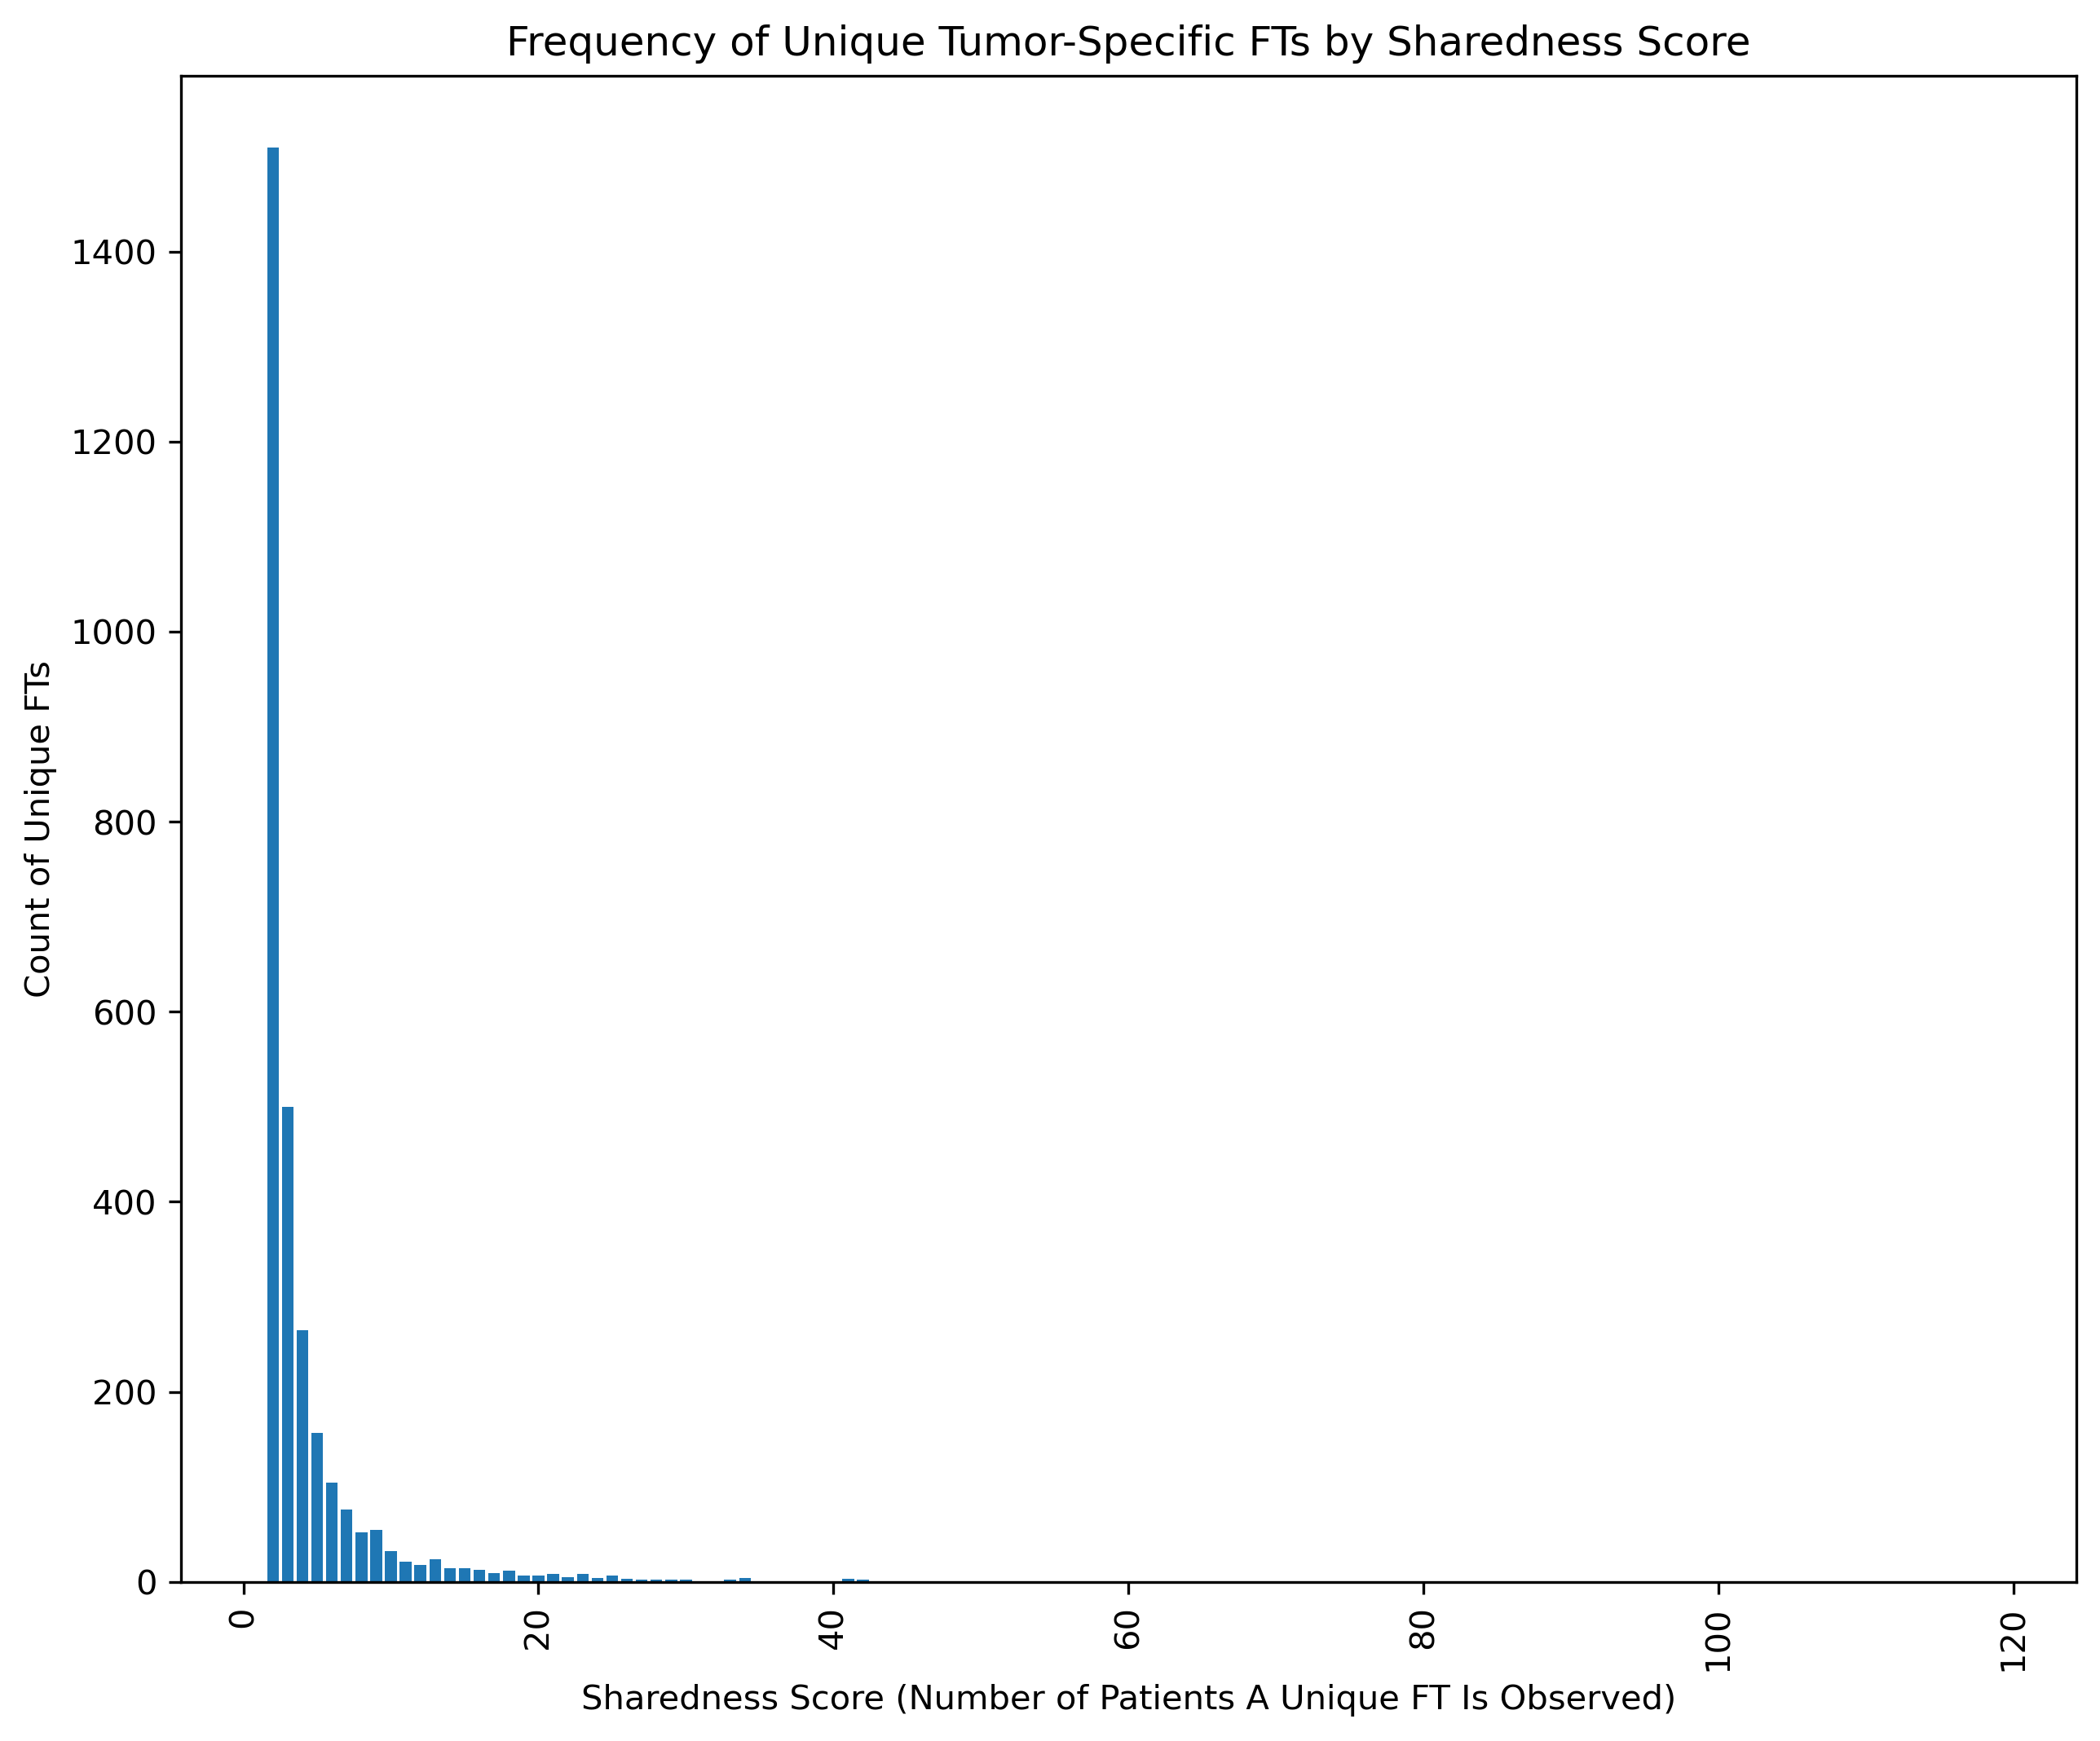

In [ ]:
import matplotlib.pyplot as plt

# Count the number of unique breakpointIDs for each unique_samples value
sharedness_counts = (
    norm_filtered_summary_df
    .group_by('unique_samples')
    .agg(
        pl.col('breakpointID').n_unique()
        .alias('unique_bp_count')
    )
    .sort('unique_samples')
)

# Prepare the data for plotting
x = sharedness_counts['unique_samples'].to_list()
y = sharedness_counts['unique_bp_count'].to_list()

# Create the bar plot
plt.figure(figsize=(10, 8), dpi=300)
plt.bar(x, y)

# Set labels and title
plt.xlabel('Sharedness Score (Number of Patients A Unique FT Is Observed)')
plt.ylabel('Count of Unique FTs')
plt.title('Frequency of Unique Tumor-Specific FTs by Sharedness Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

In [83]:
# Count the number of unique breakpointIDs for each unique_samples value
sharedness_score = (
    norm_filtered_summary_tnbc_df
    .group_by('unique_samples')
    .agg(
        pl.col('breakpointID').n_unique()
        .alias('unique_ft_count')
    )
    .sort('unique_samples')
)
sharedness_score

unique_samples,unique_ft_count
u32,u32
2,289
3,76
4,38
5,20
6,15
7,9
8,5
9,2
10,3


In [87]:
sharedness_score = sharedness_score.with_columns([
        pl.col('unique_samples').cast(pl.Utf8)
    ])
sharedness_score

unique_samples,unique_ft_count
str,u32
"""2""",289
"""3""",76
"""4""",38
"""5""",20
"""6""",15
"""7""",9
"""8""",5
"""9""",2
"""10""",3


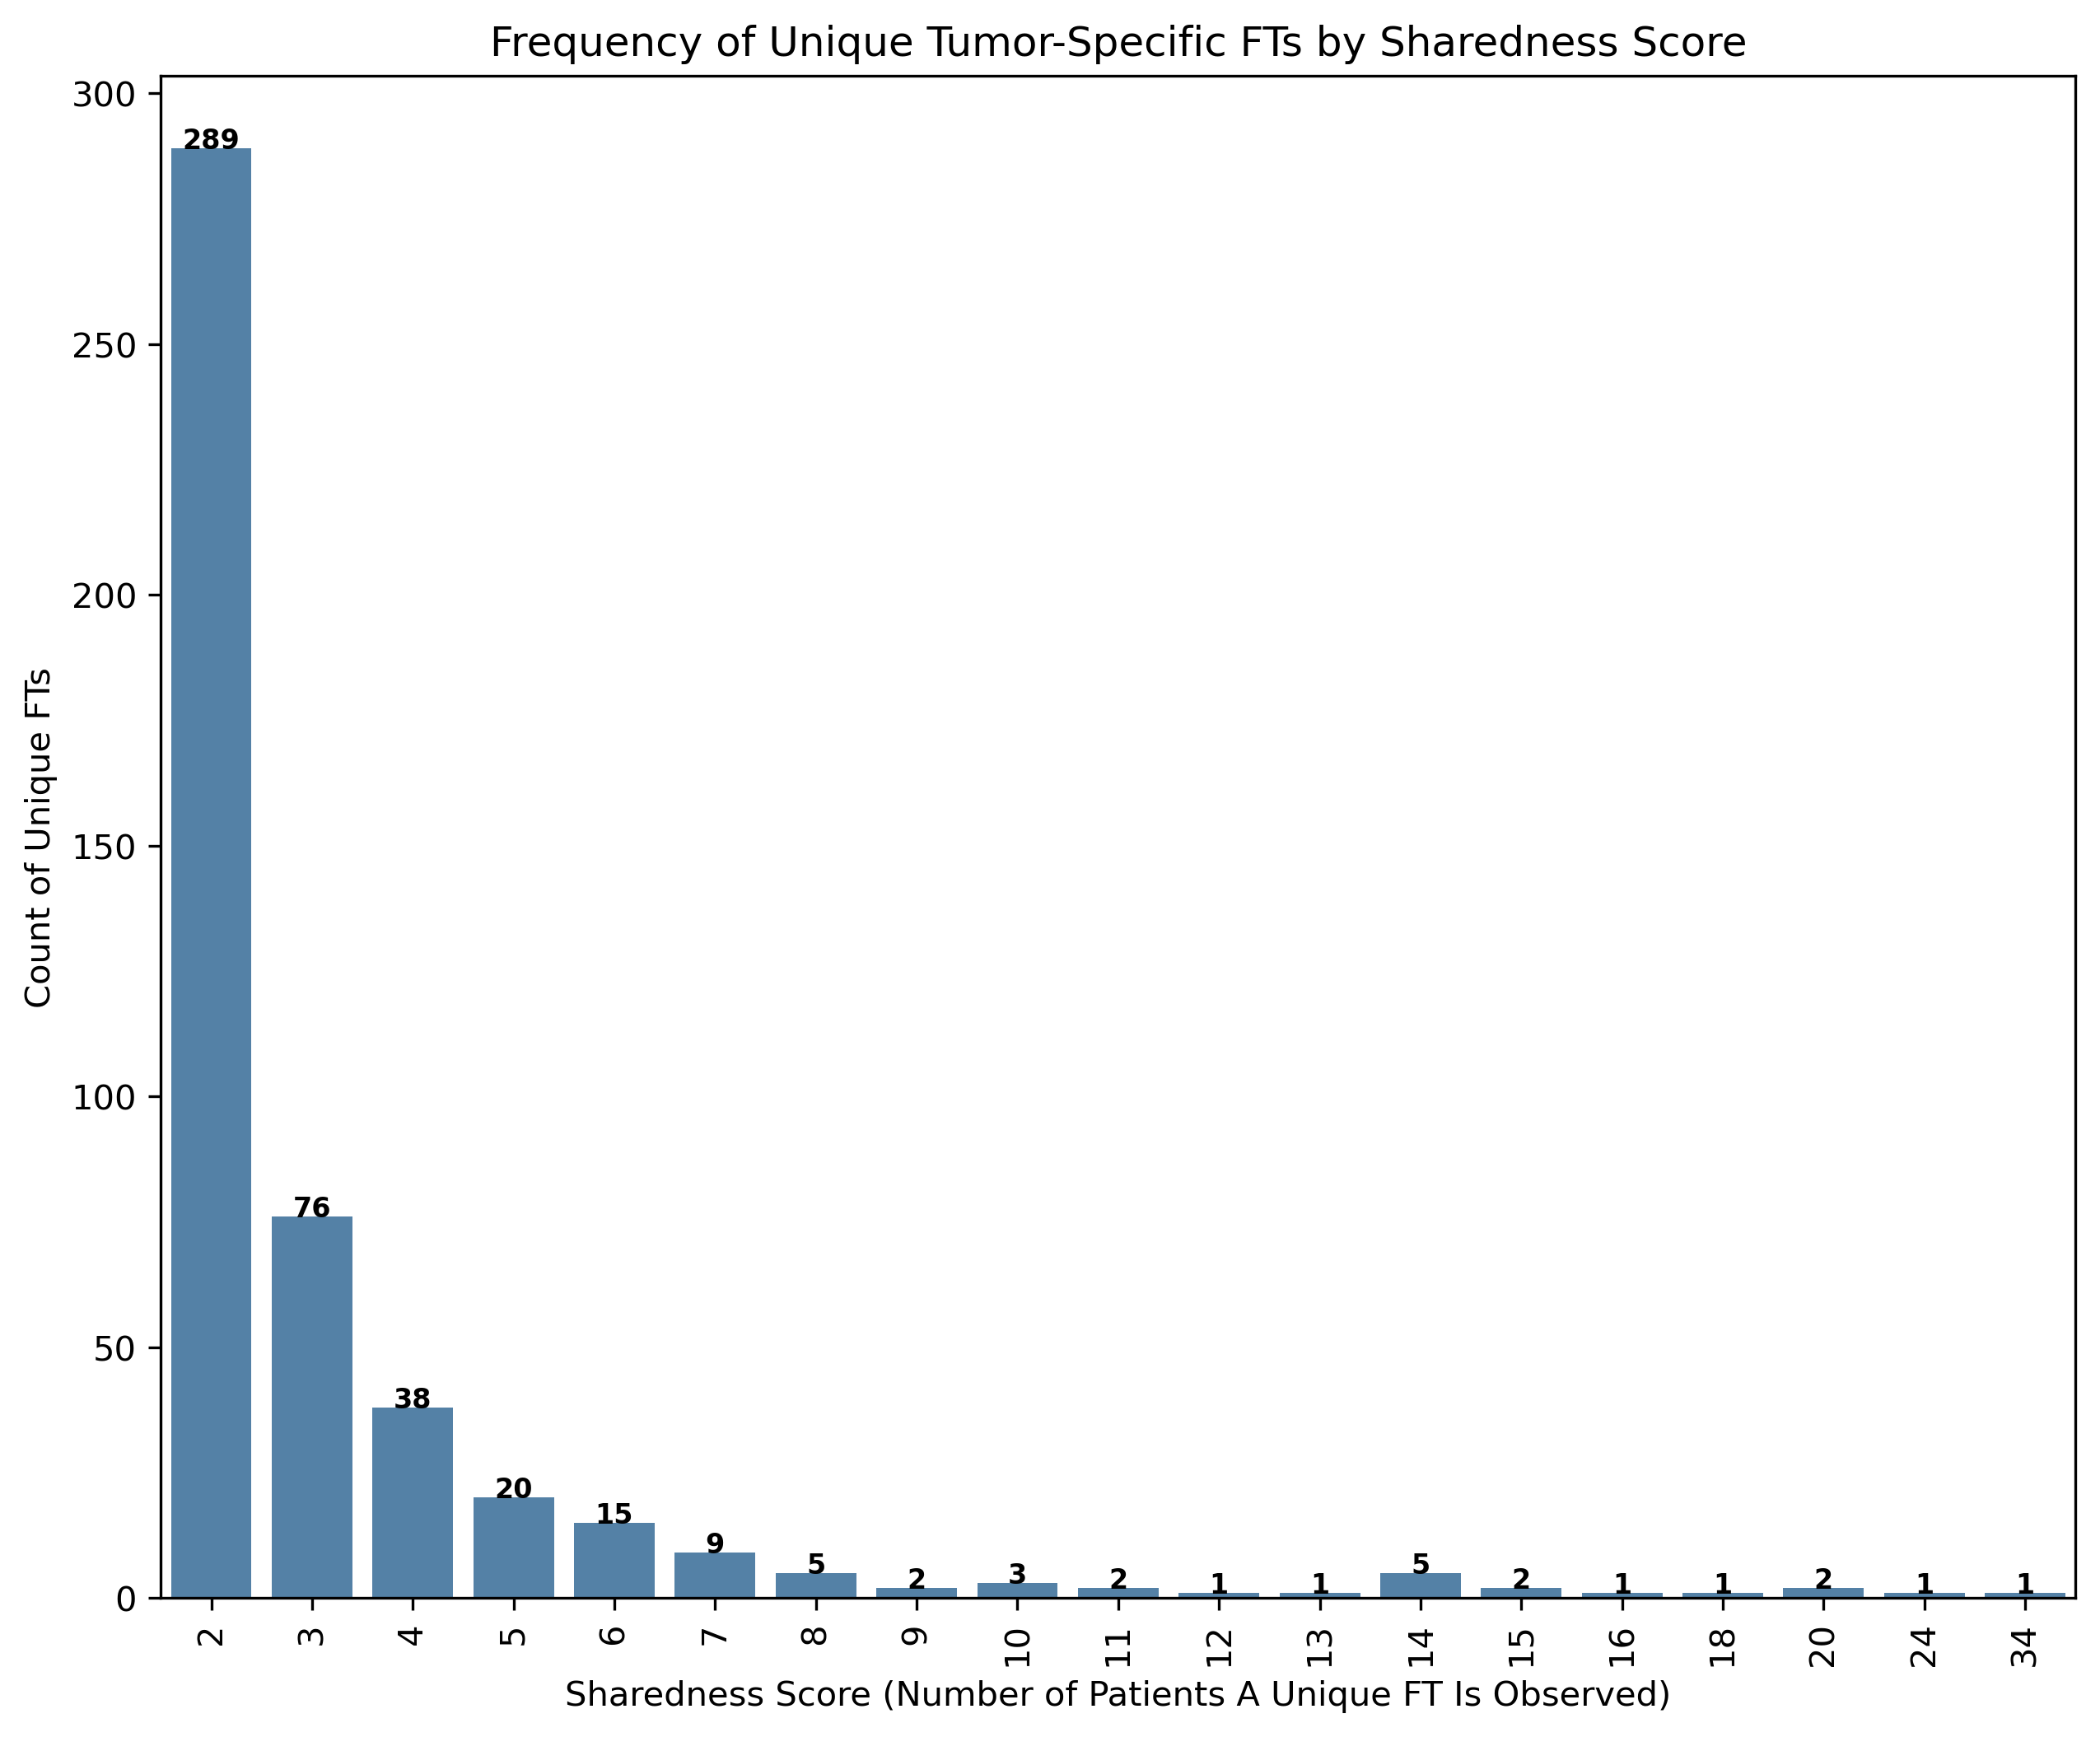

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

# Create the bar plot
plt.figure(figsize=(10, 8), dpi=300)
sns.barplot(x=sharedness_score['unique_samples'],y=sharedness_score['unique_ft_count'], color='steelblue')

# Add value labels on top of the bars
for i, v in enumerate(sharedness_score['unique_ft_count']):
    plt.text(i, v, str(v), color='black', ha='center', fontweight='bold', fontsize=8)
    

# Set labels and title
plt.xlabel('Sharedness Score (Number of Patients A Unique FT Is Observed)')
plt.ylabel('Count of Unique FTs')
plt.title('Frequency of Unique Tumor-Specific FTs by Sharedness Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()